In [15]:
from mido import MidiFile, Message #Docs: https://mido.readthedocs.io/en/latest/search.html?q=Track&check_keywords=yes&area=default  --- Run in the testenv. To activate it use conda activate testenv
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import csv
from os import makedirs, path

Nota para exportar: eliminar las tracks de percusión

In [2]:
#Individual track analisis

def get_note_list(track):
    notes = []
    for m in track:
        if m.type == 'note_on':
            notes.append(m.note)
    return notes


with open('resources/Midi_notes.csv') as di:
    read = csv.DictReader(di)
    midi_note_dict = next(read)

    
def midiNum_to_note(num):
    if 20 < num < 128:
        return midi_note_dict[str(num)]
    else:
        return None
    
    
def count_notes(track):
    Track_note_list = get_note_list(track)
    n_counter = Counter(Track_note_list)
    return n_counter

In [3]:
# Multi-track analisis and preparation

def det_song_range(track_counts):
    '''Determina las notas mas bajas y mas altas de un conjunto de cuentas de notas'''
    song_range = [[],[]]
    for i in range(0,len(track_counts)):
        song_range[0].append(min(track_counts[i].keys()))
        song_range[1].append(max(track_counts[i].keys()))
    return min(song_range[0]), max(song_range[1])+1


def fill_note_count_range(track_count, rmin, rmax):
    '''Esto se asegura de que esten todas las notas en el rango de la cancion,
    aunque dichas notas no se encuentren presentes'''
    for i in range(rmin, rmax):
            track_count[i] += 0   

            
def ordered_multiTrack_note_count(tracks):
    '''Entrega una lista de diccionarios ordenados con el rango completo de notas
    separado por pistas. Además, entrega el rango de la lista'''
    mT_ord_count = []
    track_counts = [Counter(get_note_list(track)) for track in tracks]
    r_min, r_max = det_song_range(track_counts)
    for track_c in track_counts:
        fill_note_count_range(track_c, r_min, r_max)
        mT_ord_count.append(OrderedDict(sorted(track_c.items())))
    return mT_ord_count, (r_min, r_max)

def plot_stacked_bars(indexes, values, colors):
    prev_bars = np.zeros(len(values[0]))
    for i in range(0, len(values)):
        plt.bar(indexes, values[i], width = 1, edgecolor = 'Black',
                linewidth=0.1, color=colors[i],
                bottom=prev_bars)
        prev_bars += np.array(values[i])

In [4]:
#Plot function

def plot_tracks_note_quantity(tracks, track_names, title):
    count_to_plot, note_range = ordered_multiTrack_note_count(tracks)
    note_indexes = [midiNum_to_note(n) for n in range(*note_range)]
    note_lists = [[k for k in c.values()] for c in count_to_plot]
    max_note_amount = max(sum([np.array(i) for i in note_lists]))
  
    plot_stacked_bars(note_indexes, note_lists, palette)

    plt.xlabel('Notes')
    plt.ylabel('Times played')
    plt.legend(track_names)
    plt.title(title)
    plt.ylim(0,max_note_amount*1.1)

In [18]:
plt.style.use('ggplot')
#palette = ["#009E73", "#0072B2", "#56B4E9", "#999999", "#E69F00" "#F0E442", "#D55E00", "#CC79A7"]
#palette from http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/  Modified order
palette =['#4c5454ff', '#a66358ff', '#2d2d2aff', '#1446a0ff', '#ff715bff', '#ffe74cff', '#ffffffff', '#8fd4cbff', '#1ea896ff', "#009E73", '#523f38ff', "#0072B2", "#56B4E9", "#999999", "#E69F00" "#F0E442", "#D55E00", "#CC79A7"]


if not path.exists("output_files"):
    makedirs("output_files")

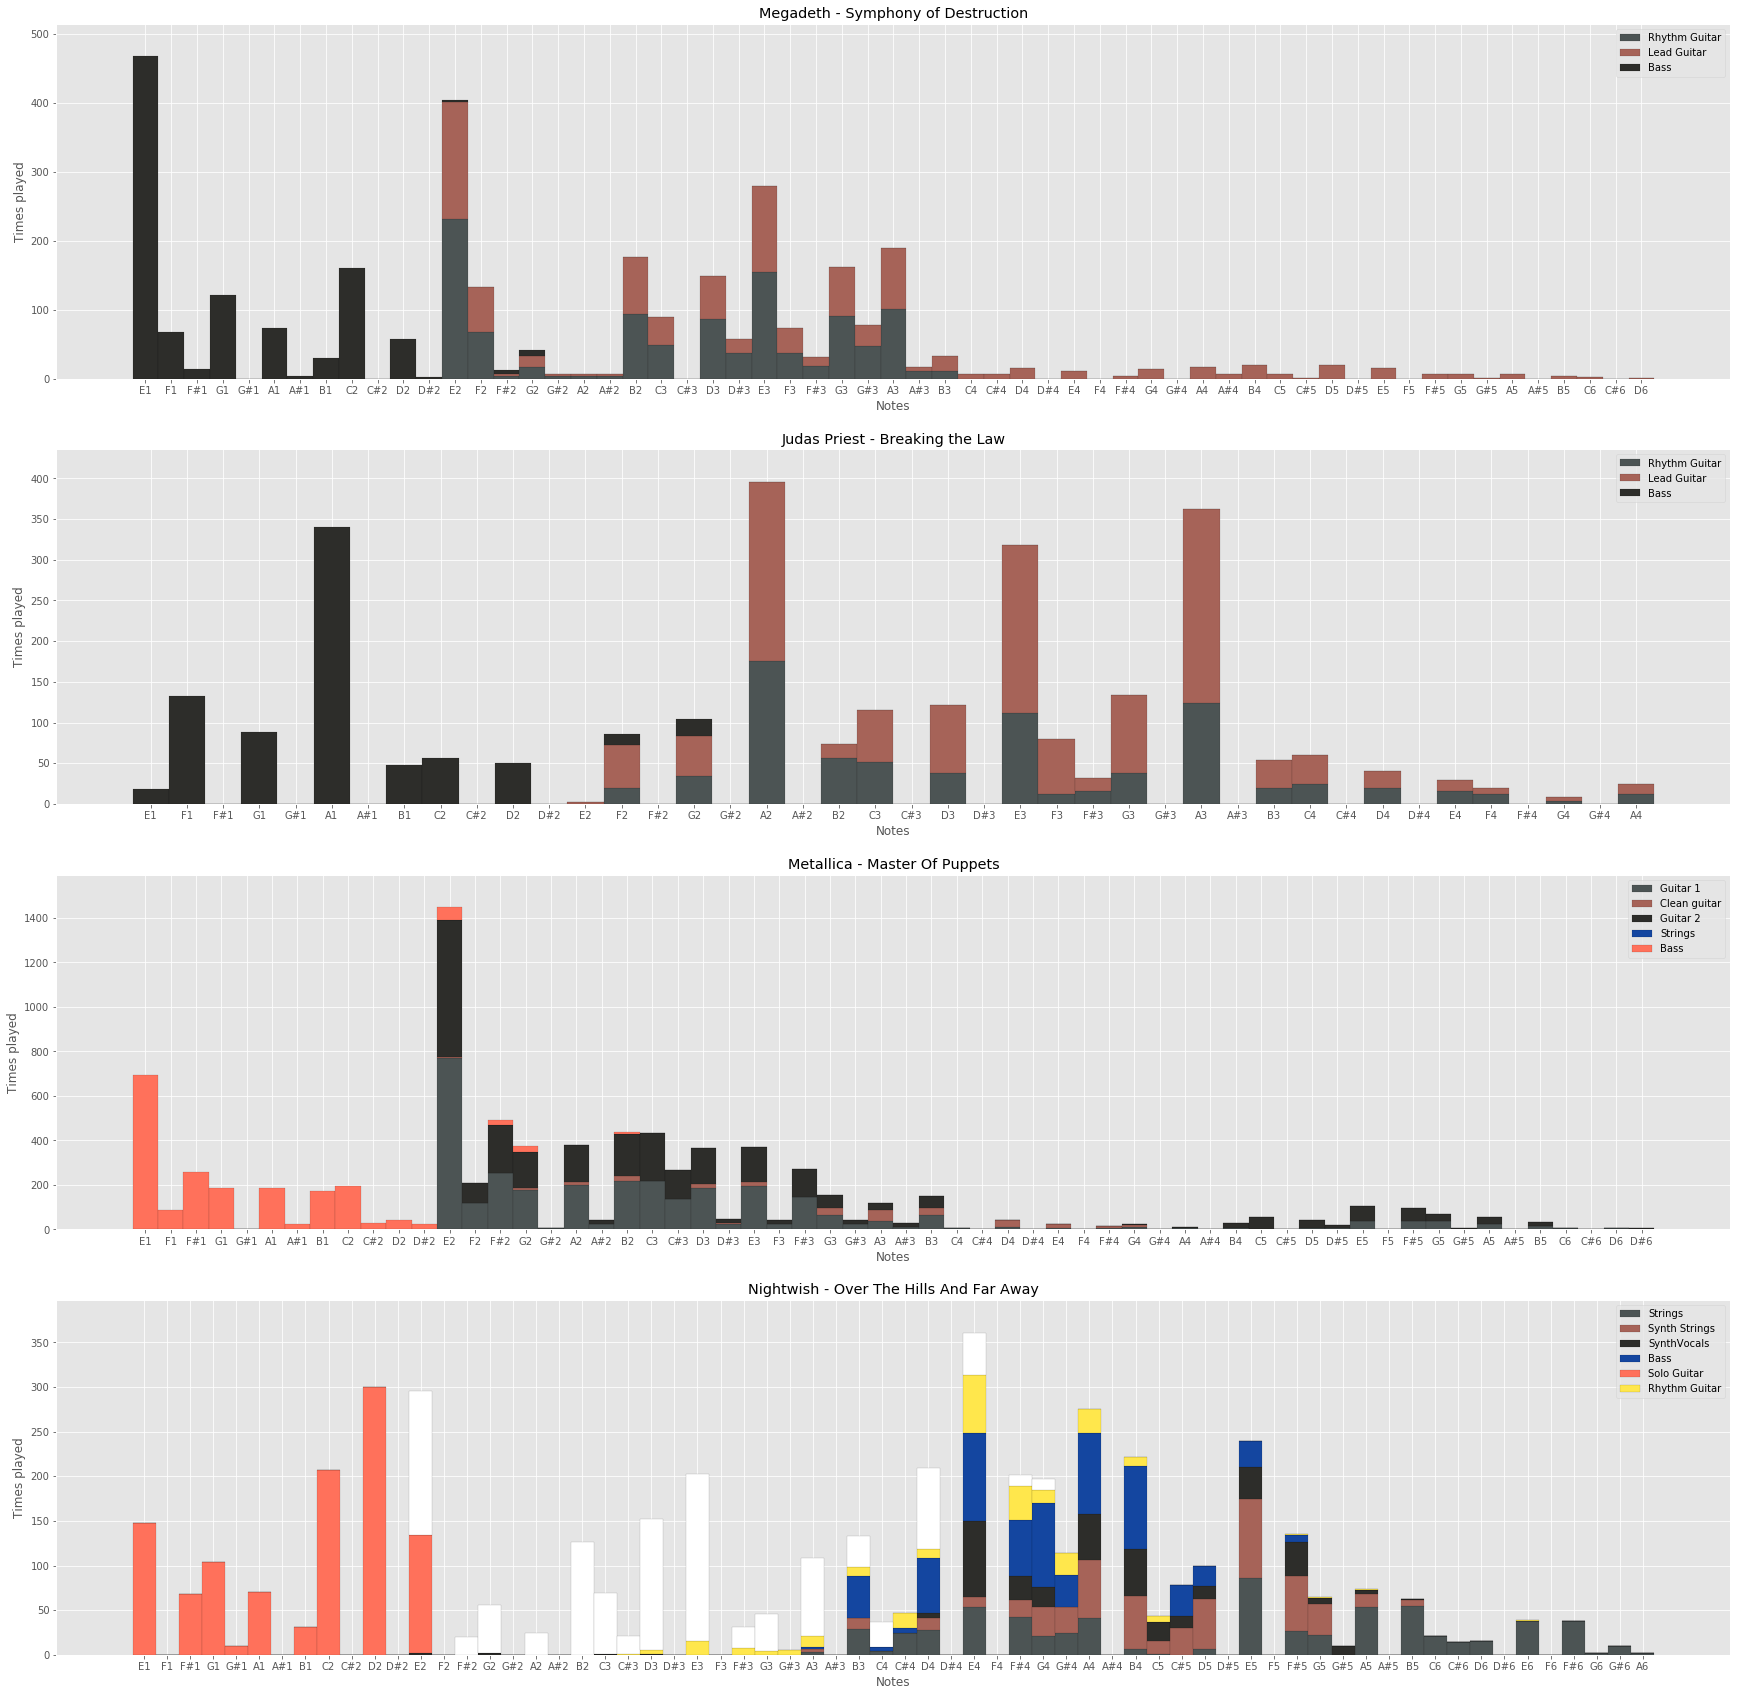

In [22]:
MD_SoD = MidiFile('resources/midi_files/Megadeth - Symphony of Destruction.mid')
JP_BtL = MidiFile('resources/midi_files/Judas Priest - Breaking the Law.mid')
Me_MoP = MidiFile('resources/midi_files/Metallica - Master Of Puppets.mid')
Nw_OtHaFA = MidiFile('resources/midi_files/Nightwish - Over The Hills And Far Away.mid')
plt.rcParams["figure.figsize"] = (30,30)

plt.subplot(4,1,1)
plot_tracks_note_quantity(MD_SoD.tracks[1:4],
                          ['Rhythm Guitar', 'Lead Guitar', 'Bass'],
                          'Megadeth - Symphony of Destruction')
plt.subplot(4,1,2)
plot_tracks_note_quantity(JP_BtL.tracks[1:4],
                          ['Rhythm Guitar', 'Lead Guitar', 'Bass'],
                          'Judas Priest - Breaking the Law')
plt.subplot(4,1,3)
plot_tracks_note_quantity(Me_MoP.tracks[1:6],
                          ['Guitar 1', 'Clean guitar', 'Guitar 2', 'Strings', 'Bass'],
                          'Metallica - Master Of Puppets')
plt.subplot(4,1,4)
plot_tracks_note_quantity(Nw_OtHaFA.tracks[1:8],
                          ['Strings', 'Synth Strings', 'Synth' 'Vocals', 'Bass', 'Solo Guitar', 'Rhythm Guitar'],
                          'Nightwish - Over The Hills And Far Away')
                          
plt.savefig('output_files/4_song_plot.png')

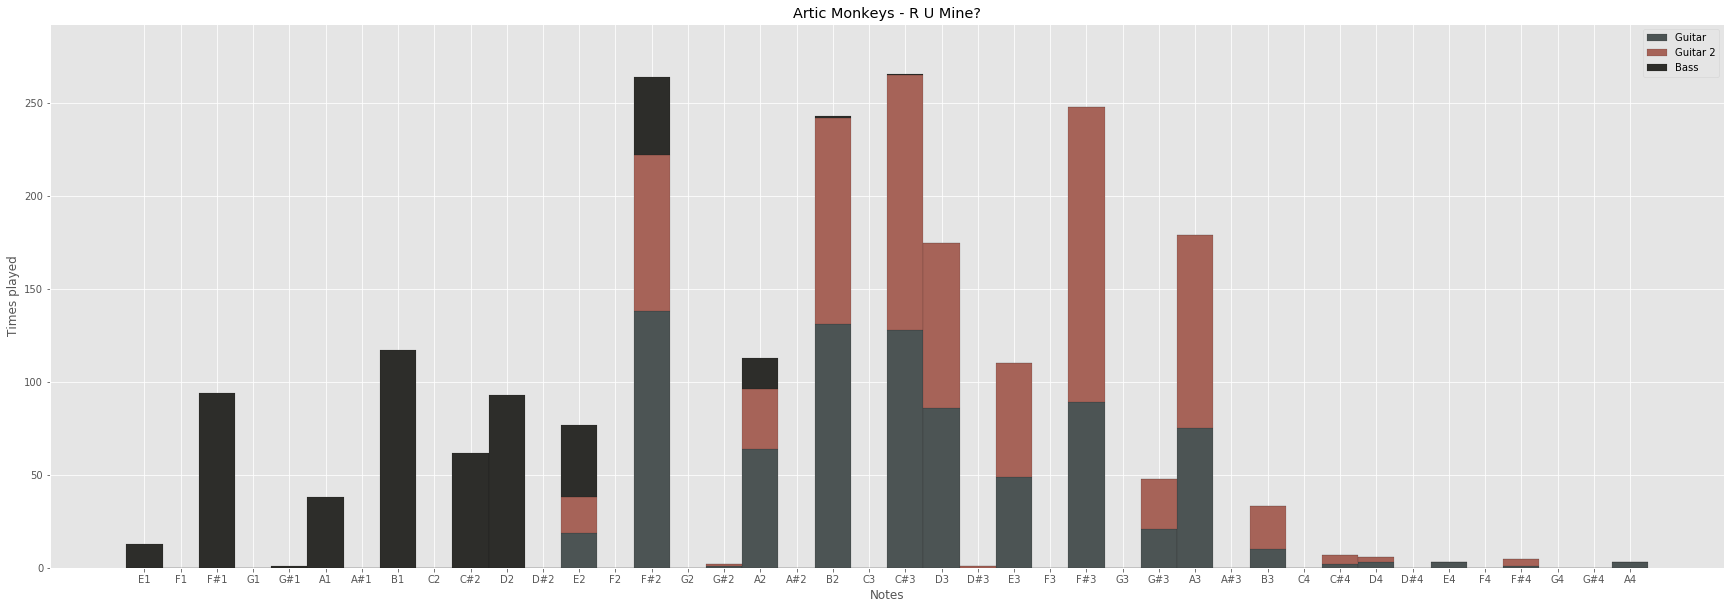

In [20]:
AM_RUMine = MidiFile('resources/midi_files/arctic_monkeys-r_u_mine.mid')
plt.rcParams["figure.figsize"] = (30,10)

plot_tracks_note_quantity(AM_RUMine.tracks[1:4],
                          ['Guitar ', 'Guitar 2', 'Bass'],
                          'Artic Monkeys - R U Mine?')

plt.savefig('output_files/AM_RUMine.png')

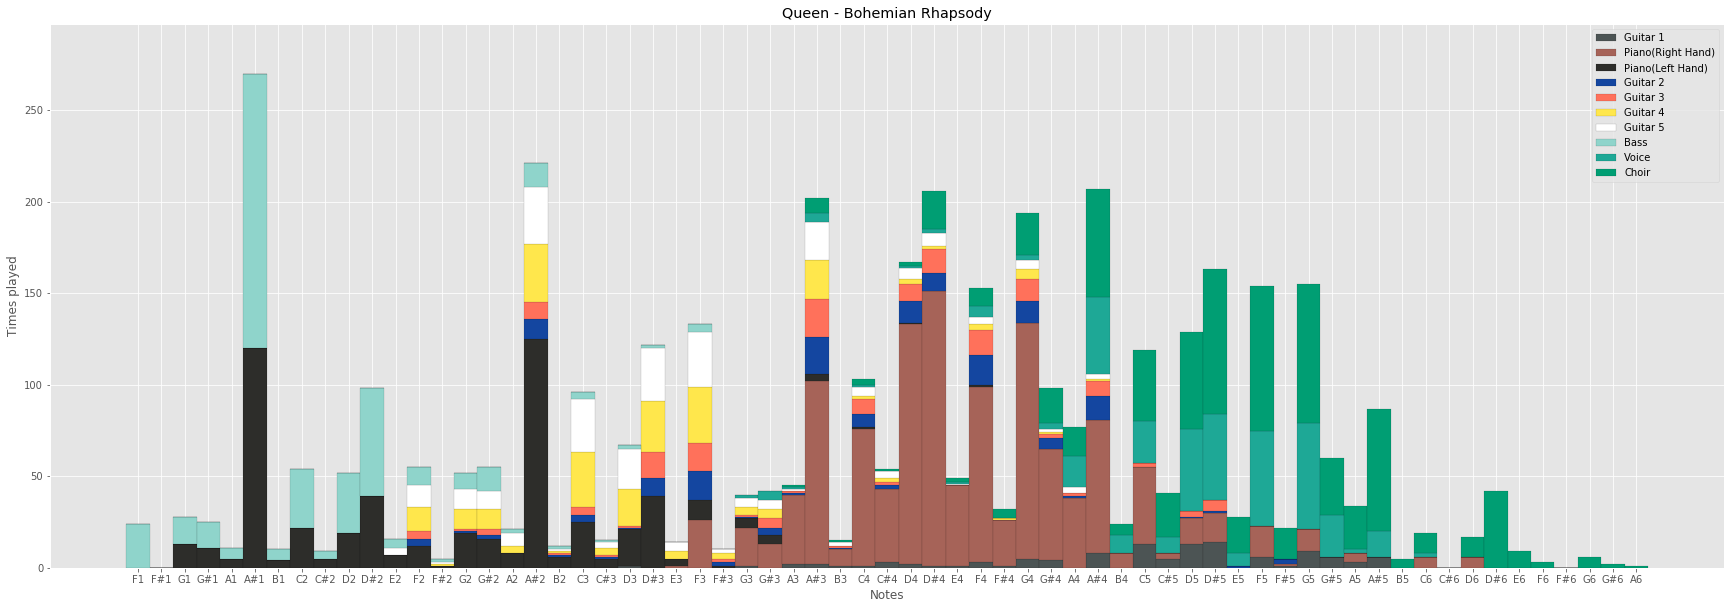

In [21]:
Q_BR = MidiFile('resources/midi_files/Queen - Bohemian Rhapsody (3).mid')
plt.rcParams["figure.figsize"] = (30,10)

plot_tracks_note_quantity(Q_BR.tracks[1:11],
                          ['Guitar 1', 'Piano(Right Hand)', 'Piano(Left Hand)', 'Guitar 2',
                          'Guitar 3', 'Guitar 4', 'Guitar 5', 'Bass', 'Voice', 'Choir'],
                          'Queen - Bohemian Rhapsody')

plt.savefig('output_files/Q-BhR.png')

In [6]:
#n_counter = Counter()
#for notes in Track_note_list:
#      n_counter += Counter(notes)


In [7]:
for i, track in enumerate(Nw_OtHaFA.tracks):
    print('Track {}: {}'.format(i, track))
print(Nw_OtHaFA.tracks)
#palette =['#4c5454ff', '#a66358ff', '#2d2d2aff', '#1446a0ff', '#ff715bff', '#ffe74cff', '#ffffffff', '#8fd4cbff', '#1ea896ff', '#523f38ff', "#009E73", "#0072B2", "#56B4E9", "#999999", "#E69F00" "#F0E442", "#D55E00", "#CC79A7"]

Track 0: <midi track '' 37 messages>
Track 1: <midi track '' 1344 messages>
Track 2: <midi track '' 1118 messages>
Track 3: <midi track '' 802 messages>
Track 4: <midi track '' 1384 messages>
Track 5: <midi track '' 2150 messages>
Track 6: <midi track '' 577 messages>
Track 7: <midi track '' 2376 messages>
Track 8: <midi track '' 4852 messages>
[<midi track '' 37 messages>, <midi track '' 1344 messages>, <midi track '' 1118 messages>, <midi track '' 802 messages>, <midi track '' 1384 messages>, <midi track '' 2150 messages>, <midi track '' 577 messages>, <midi track '' 2376 messages>, <midi track '' 4852 messages>]


{21: 'A0',
 22: 'A#0',
 23: 'B0',
 24: 'C1',
 25: 'C#1',
 26: 'D1',
 27: 'D#1',
 28: 'E1',
 29: 'F1',
 30: 'F#1',
 31: 'G1',
 32: 'G#1',
 33: 'A1',
 34: 'A#1',
 35: 'B1',
 36: 'C2',
 37: 'C#2',
 38: 'D2',
 39: 'D#2',
 40: 'E2',
 41: 'F2',
 42: 'F#2',
 43: 'G2',
 44: 'G#2',
 45: 'A2',
 46: 'A#2',
 47: 'B2',
 48: 'C3',
 49: 'C#3',
 50: 'D3',
 51: 'D#3',
 52: 'E3',
 53: 'F3',
 54: 'F#3',
 55: 'G3',
 56: 'G#3',
 57: 'A3',
 58: 'A#3',
 59: 'B3',
 60: 'C4',
 61: 'C#4',
 62: 'D4',
 63: 'D#4',
 64: 'E4',
 65: 'F4',
 66: 'F#4',
 67: 'G4',
 68: 'G#4',
 69: 'A4',
 70: 'A#4',
 71: 'B4',
 72: 'C5',
 73: 'C#5',
 74: 'D5',
 75: 'D#5',
 76: 'E5',
 77: 'F5',
 78: 'F#5',
 79: 'G5',
 80: 'G#5',
 81: 'A5',
 82: 'A#5',
 83: 'B5',
 84: 'C6',
 85: 'C#6',
 86: 'D6',
 87: 'D#6',
 88: 'E6',
 89: 'F6',
 90: 'F#6',
 91: 'G6',
 92: 'G#6',
 93: 'A6',
 94: 'A#6',
 95: 'B6',
 96: 'C7',
 97: 'C#7',
 98: 'D7',
 99: 'D#7',
 100: 'E7',
 101: 'F7',
 102: 'F#7',
 103: 'G7',
 104: 'G#7',
 105: 'A7',
 106: 'A#7',
 107: 'B7',

AnalizarTO-DO:

 - Analizar la duración de las notas.
 - Animaciones https://www.youtube.com/watch?v=Ercd-Ip5PfQ&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=9
 -